In [12]:
import pandas as pd
import random
import math

# read in time point 1 for training
# train on it - model 1
# test on tp 2
# read tp 2
# add it to xgb - model 2
# test on tp 3
# read tp 3
# add it to xgb - model 3
# test on tp 4
# test model 1
data = pd.read_csv('../data/ts_Watertown_SD_99_to_11_no_03_stat.csv')
data.head()

,index,yield,radiation,rain,avg_min_temp,avg_max_temp,class
0,1,-0.121587,133284.65,651.64,2.107548,14.704929,2
1,2,-0.597196,149682.73,751.40,3.060238,15.618463,1
2,3,-0.027460,160190.33,806.56,3.714765,16.238282,0
3,4,-0.218519,246746.81,1309.28,0.858973,12.943016,1
4,5,0.322222,262372.13,1420.14,1.447246,13.547210,1


In [13]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

metadata.detect_from_dataframe(data)
model = CTGANSynthesizer(metadata)
model.fit(data)

# samples_out = 20000 # total number of samples/records to generate/synthesize
# no_stds = 1.5 # number of standard deviations within which synthesized values must fall
# number_of_classes = (data['class'].unique()).size # number of unique classes in input data

# data_len = len(data.index)
# F = [] # a list of the feature vectors dataframes, one per class
# for class_no in range(number_of_classes):
#     df = pd.DataFrame(data[data['class'] == class_no])
#     F.append(df)

    
# def synthesize_tabular_data(F, samples_out, no_stds, no_classes, no_records):
#     new_F = []
#     for index, entry in enumerate(F):
#         yield_ = entry['yield']
#         mean_yield = yield_.mean()
#         std_yield = yield_.std()
#         total_rad = entry['radiation']
#         mean_rad = total_rad.mean()
#         std_rad = total_rad.std()
#         total_rain = entry['rain']
#         mean_rain = total_rain.mean()
#         std_rain = total_rain.std()
#         avg_max_temp = entry['avg_max_temp']
#         mean_max_temp = avg_max_temp.mean()
#         std_max_temp = avg_max_temp.std()
#         avg_min_temp = entry['avg_min_temp']
#         mean_min_temp = avg_min_temp.mean()
#         std_min_temp = avg_min_temp.std()
        
#         new_yields = []
#         new_rads = []
#         new_rains = []
#         new_max_temps = []
#         new_min_temps = []
        
#         # calculate potcii: percentage of this class in input
#         potcii = (len(entry)/no_records)
#         no_records_to_generate = round(potcii * samples_out)
        
#         for i in range(no_records_to_generate):
#             new_yield = random.uniform(mean_yield - std_yield*no_stds, mean_yield + std_yield*no_stds)
#             new_yields.append(new_yield)
            
#             new_rad = random.uniform(mean_rad - std_rad*no_stds, mean_rad + std_rad*no_stds)
#             new_rads.append(new_rad)
            
#             new_rain = random.uniform(mean_rain - std_rain*no_stds, mean_rain + std_rain*no_stds)
#             new_rains.append(new_rain)
        
#             new_max_temp = random.uniform(mean_max_temp - std_max_temp*no_stds, mean_max_temp + std_max_temp*no_stds)
#             new_max_temps.append(new_max_temp)
            
#             new_min_temp = random.uniform(mean_min_temp - std_min_temp*no_stds, mean_min_temp + std_min_temp*no_stds)
#             new_min_temps.append(new_min_temp)
            
#         concat_yields = pd.concat([yield_, pd.DataFrame(new_yields)])
#         concat_rads = pd.concat([total_rad, pd.DataFrame(new_rads)])
#         concat_rain = pd.concat([total_rain, pd.DataFrame(new_rains)])
#         concat_max_temps = pd.concat([avg_max_temp, pd.DataFrame(new_max_temps)])
#         concat_min_temps = pd.concat([avg_min_temp, pd.DataFrame(new_min_temps)])
#         new_df = pd.DataFrame()
#         new_df['yield'] = concat_yields
#         new_df['radiation'] = concat_rads
#         new_df['rain'] = concat_rain
#         new_df['avg_max_temp'] = concat_max_temps
#         new_df['avg_min_temp'] = concat_min_temps
#         new_df['class'] = index
#         print(index)
#         new_F.append(new_df)
        
#     return pd.concat(new_F)

# new_data = synthesize_tabular_data(F, samples_out, no_stds, number_of_classes, data_len)

In [14]:
new_data = model.sample(20000)

In [15]:
new_data.to_csv('data/DAF_XGB_boost_TVAE_20k_0613_wtr2highSD.csv')
new_data.head()

,index,yield,radiation,rain,avg_min_temp,avg_max_temp,class
0,757712695,-0.742865,176565.874862,840.46,1.730818,11.858168,0
1,774510748,-0.018143,250298.637915,1024.11,0.300360,11.258373,2
2,403604820,-0.986329,175270.956111,620.06,2.132913,11.258373,1
3,282377106,-0.934144,375424.045179,2277.15,0.922551,13.078027,2
4,163410770,-0.730625,122218.684189,1007.64,2.829844,11.258373,0


In [16]:
# get aggregate data
targetDataLoc = '../data/ts_Highmore_SD_11_stat.csv'

targetDf = pd.read_csv(targetDataLoc) #pd.read_csv(targetDataLoc)
aggDf = new_data #pd.read_csv(aggDataLoc)
boostDataLoc = '../data/ts_Highmore_SD_99_04_07_08_10_stat.csv'
boostDf = pd.read_csv(boostDataLoc)
targetDf.head()

,index,yield,radiation,rain,avg_min_temp,avg_max_temp,class
0,1,-0.026000,126722.90,943.09,1.091832,13.204480,2
1,2,-1.574333,139066.58,1127.80,2.318265,14.397854,1
2,3,0.237889,151489.05,1207.41,3.256809,15.447404,2


In [17]:
all_years_Loc = '../data/ts_Highmore_SD_99_04_07_08_10_11_ylds_idx.csv'
all_yearsDf = pd.read_csv(all_years_Loc)
final_year_Loc = '../data/Highmore_SD_for_math_mv_4_avgs_99_to_10_hdr_idx.csv'
final_yearDf = pd.read_csv(final_year_Loc)
final_yearDf.head()
target_year_Loc = '../data/ts_Highmore_2011_ylds_hdr_idx.csv'
target_yearDf = pd.read_csv(target_year_Loc)

In [18]:
############## imports
# general
import statistics
import datetime
#from sklearn.externals import joblib # save and load models
import random
# data manipulation and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## machine learning stuff
# preprocessing
from sklearn import preprocessing
# feature selection
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_regression
# pipeline
from sklearn.pipeline import Pipeline
# train/testing
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score  
# error calculations
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# models
from sklearn.linear_model import LinearRegression # linear regression
from sklearn.linear_model import BayesianRidge #bayesisan ridge regression
from sklearn.svm import SVC  # support vector machines classification
from sklearn.gaussian_process import GaussianProcessRegressor # import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor # k-nearest neightbors for regression
from sklearn.neural_network import MLPRegressor # neural network for regression
from sklearn.neural_network import MLPClassifier # neural network for classification
from sklearn.tree import DecisionTreeRegressor # decision tree regressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor  # random forest regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier # adaboost for classification
import xgboost as xgb
# saving models
# from sklearn.externals import joblib
import joblib

# import the API
APILoc = 'API/'

import sys
sys.path.insert(0, APILoc)

from API import *

In [19]:
# filter out the features that will not be used by the machine learning models

xColumnsToKeep = ["radiation","rain", "avg_max_temp", "avg_min_temp"]

# the target to keep
yColumnsToKeep = ["yield"]

# get a dataframe containing the features and the targets
xDf = aggDf[xColumnsToKeep]
test_xDf = targetDf[xColumnsToKeep]
boost_xDf = boostDf[xColumnsToKeep]

yDf = aggDf[yColumnsToKeep]
test_yDf = targetDf[yColumnsToKeep]
boost_yDf = boostDf[yColumnsToKeep]

# reset the index
xDf = xDf.reset_index(drop=True)
yDf = yDf.reset_index(drop=True)
test_xDf = test_xDf.reset_index(drop=True)
test_yDf = test_yDf.reset_index(drop=True)
boost_xDf = boost_xDf.reset_index(drop=True)
boost_yDf = boost_yDf.reset_index(drop=True)

pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_columns', 500)

xCols = list(xDf)

In [20]:
# hide the warnings because training the neural network caues lots of warnings.
import warnings
warnings.filterwarnings('ignore')

# make the parameter grids for sklearn's gridsearchcv
rfParamGrid = {
        'model__n_estimators': [5, 10, 25, 50, 100], # Number of estimators
        'model__max_depth': [5, 10, 15, 20], # Maximum depth of the tree
        'model__criterion': ["mae"]
    }
knnParamGrid ={
        'model__n_neighbors':[2,5,10],
        'model__weights': ['uniform', 'distance'],
        'model__leaf_size': [5, 10, 30, 50]    
    }
svrParamGrid = {
        'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'model__C': [0.1, 1.0, 5.0, 10.0],
        'model__gamma': ["scale", "auto"],
        'model__degree': [2,3,4,5]
    }
nnParamGrid = {
        'model__hidden_layer_sizes':[(3), (5), (10), (3,3), (5,5), (7,7)],
        'model__solver': ['sgd', 'adam'],
        'model__learning_rate' : ['constant', 'invscaling', 'adaptive'],
        'model__learning_rate_init': [0.1, 0.01, 0.001]      
    }

linRegParamGrid = {}

bayesParamGrid={
        'model__n_iter':[100,300,500]
    }

dtParamGrid = {
    'model__criterion': ['mae'],
    'model__max_depth': [5,10,25,50,100]
    }

xgbParamGrid = {}

aModelList = [#(RandomForestRegressor(), rfParamGrid, "rfTup.pkl")]#,
              #(KNeighborsRegressor(), knnParamGrid, "knnTup.pkl"),
              #(SVC(), svrParamGrid, "svrTup.pkl")]#,
             #(MLPClassifier(), nnParamGrid, "nnTup.pkl")]#,
             #(LinearRegression(), linRegParamGrid, "linRegTup.pkl")]#,
             #(BayesianRidge(), bayesParamGrid, "bayesTup.pkl"),
             #(DecisionTreeRegressor(), dtParamGrid, "dtTup.pkl")]
             (xgb.XGBRegressor(), xgbParamGrid, "xgbTup.pkl")]

N = 4
workingDir = 'working_dir'
numFeatures = 4 # 11

model:  xgbTup
Avg MAE:  1231.316
Avg R squared:  -0.078
Best MAE:  1217.082
Best R squared:  -0.069
 
test results on our test data: 
      yield
0 -0.026000
1 -1.574333
2  0.237889
[ 0.2297532  -0.11338088 -0.18956208]
adjusted predictions: 
[2.4874645022394715, 1.681330036836258, 0.9388507827093506]
          0
0  2.487465
1  1.681330
2  0.938851
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     1.694
Date:                Wed, 02 Oct 2024   Prob (F-statistic):              0.417
Time:                        02:39:30   Log-Likelihood:                0.21451
No. Observations:                   3   AIC:                             3.571
Df Residuals:                       1   BIC:                             1.768
Df Model:       

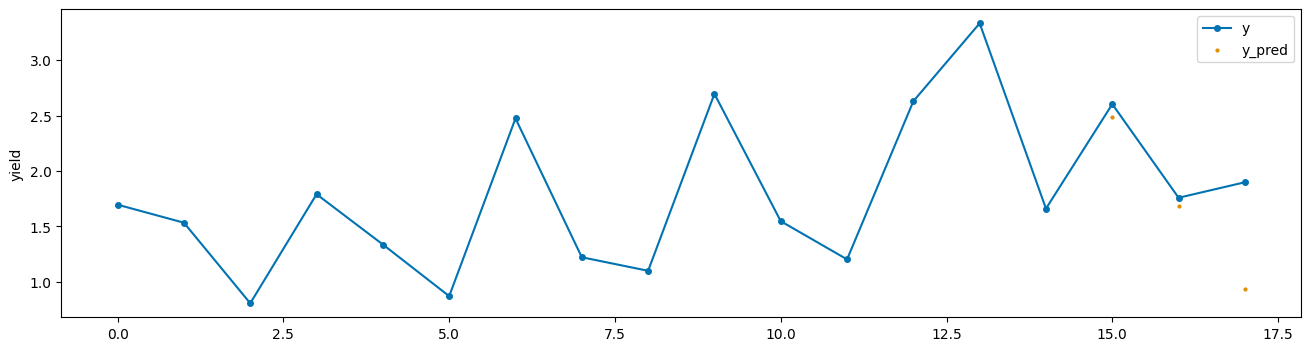

In [21]:
saveMLResults(all_yearsDf, final_yearDf, target_yearDf, boost_xDf, boost_yDf, test_xDf, test_yDf, N, xDf, yDf, aModelList, workingDir, numFeatures, printResults=True)